# Final Report

Transplant the necessary code from `eda.ipynb` to this notebook, and clean everything up for presentation!

In [1]:
!pip install pandas
!pip install matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
onebedroom = pd.read_csv('data/City_MedianRentalPrice_1Bedroom.csv')
fourbedroom = pd.read_csv('data/City_MedianRentalPrice_4Bedroom.csv')


In [4]:
onebedroom['bedrooms'] = 1
onebedroom.head(50)

,Unnamed: 0,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,bedrooms
0,0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,...,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0,1
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0,1
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,...,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0,1
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,...,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0,1
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,...,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5,1
5,5,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia County,6,NaN,NaN,NaN,NaN,...,1525.0,1496.0,1500.0,1507.5,1554.0,1495.0,1500.0,1500.0,1470.0,1
6,6,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7,NaN,NaN,NaN,NaN,...,1115.5,1172.5,1161.0,1129.0,1102.5,1122.0,1100.0,1110.0,1170.0,1
7,7,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,8,NaN,NaN,NaN,NaN,...,1010.0,1008.0,1026.0,1010.0,1040.0,1029.5,1030.0,1025.0,1028.0,1
8,8,San Diego,CA,San Diego-Carlsbad,San Diego County,9,NaN,NaN,NaN,NaN,...,1990.0,2000.0,2050.0,2100.0,2100.0,2100.0,2049.5,1995.0,2000.0,1
9,9,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,10,NaN,NaN,NaN,NaN,...,1375.0,1375.0,1360.0,1355.0,1330.0,1335.0,1340.0,1330.0,1340.0,1


In [5]:
fourbedroom['bedrooms'] = 4
fourbedroom.shape

(316, 126)

In [6]:
rentals = pd.concat([onebedroom, fourbedroom])

In [7]:
rentals.head()
rentals.shape

(1134, 126)

In [8]:
# rslt_df = dataframe[dataframe['Percentage'] > 80]
boston = rentals [rentals['RegionName'] == 'Boston']


In [9]:
boston.head()
boston_dates = boston.drop(boston.columns[[0, 1, 2, 3, 4, 5]], axis=1)


In [13]:
dates1 = []
dates2 = []
rental_prices1 = []
rental_prices2 = []

for col in boston_dates:
    dates1.append(col)
    dates2.append(col)

    
one_bedroom_dates = pd.DataFrame(dates1, columns = ['Date'])
four_bedroom_dates = pd.DataFrame(dates2, columns = ['Date'])

one_bedroom_rent = boston.iloc[0].drop(boston.columns[[0, 1, 2, 3, 4, 5]])
four_bedroom_rent = boston.iloc[1].drop(boston.columns[[0, 1, 2, 3, 4, 5]])

for price in one_bedroom_rent:
    rental_prices1.append(price)
    
for price in four_bedroom_rent:
    rental_prices2.append(price)
    
rents1 = pd.DataFrame(rental_prices1, columns = ['Rent'])

rents2 = pd.DataFrame(rental_prices2, columns = ['Rent'])



boston_rents1 = pd.concat([one_bedroom_dates, rents1], axis='columns')
boston_rents1['Bedrooms'] = 'one'
boston_rents1.drop(boston_rents1.tail(1).index, inplace=True)

boston_rents2 = pd.concat([four_bedroom_dates, rents2], axis='columns')
boston_rents2['Bedrooms'] = 'four'
boston_rents2.drop(boston_rents2.tail(1).index, inplace=True)


one_vs_four = pd.concat([boston_rents1, boston_rents2])

one_vs_four




,Date,Rent,Bedrooms
0,2010-02,NaN,one
1,2010-03,NaN,one
2,2010-04,NaN,one
3,2010-05,NaN,one
4,2010-06,NaN,one
...,...,...,...
114,2019-08,3550.0,four
115,2019-09,3550.0,four
116,2019-10,3500.0,four
117,2019-11,3600.0,four


/Users/tabithaperry/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


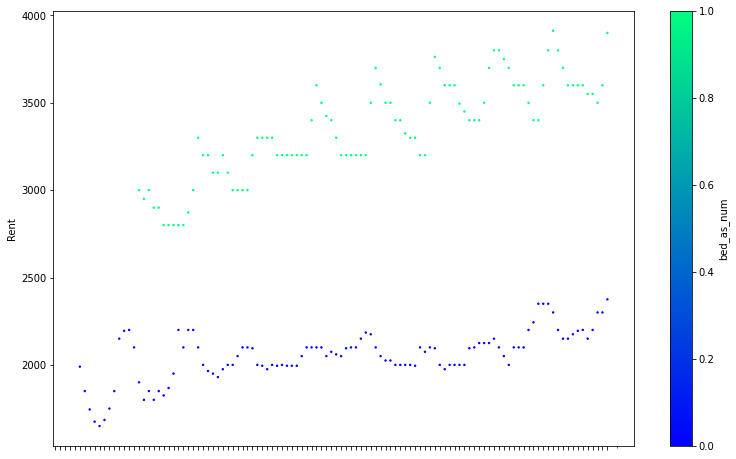

In [16]:
mapping_dict = { 'one': 0,'four': 1 }
one_vs_four['bed_as_num'] = one_vs_four['Bedrooms'].map(mapping_dict)
one_vs_four
one_vs_four.plot(kind='scatter', x='Date', y='Rent', figsize=(13, 8), s=2, c='bed_as_num', colormap='winter');
